# Visualization of a point cloud range image

This presents how the visualization module can be run using the `py4dgeo` package to project a point cloud. As a first step, we import the `py4dgeo` packages:

In [8]:
import py4dgeo
from py4dgeo.util import find_file
import os

## Initialize epoch
Next, we need to load one dataset. Here, we work with a rather small synthetical data set. Once the epoch is loaded, we need to add the coordinate from where the projection is done. The best position is often the coordinates of the scanner the captured the point cloud.

In [ ]:
t1_file = find_file(r"ahk_2017_652900_5189100_gnd_subarea.laz")

epoch = py4dgeo.read_from_las(t1_file)
epoch.scanpos_info = [652924, 5189200, 2514]  # scanner position ([X, Y, Z])
desktop = os.path.normpath(os.path.expanduser("~/Desktop"))
filename = os.path.join(desktop, "p4dgeo_image_projection.tif")

## Project point cloud for range image visualization
To project the point cloud, we use the ```project_pc()``` method. Here, we use the default parameters and save the image. 

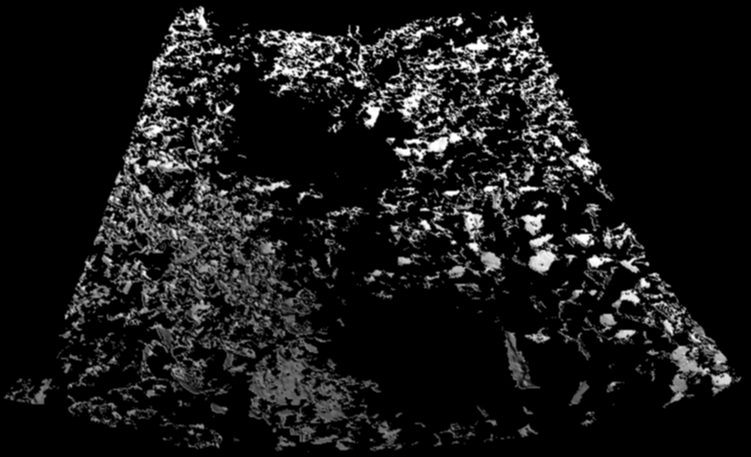

In [10]:
epoch.project_pc()
epoch.visualize(outfile=filename, from_notebook=True)

## Visualize events
It is also possible to visualize objects of events as polygons directly on the image as follows.

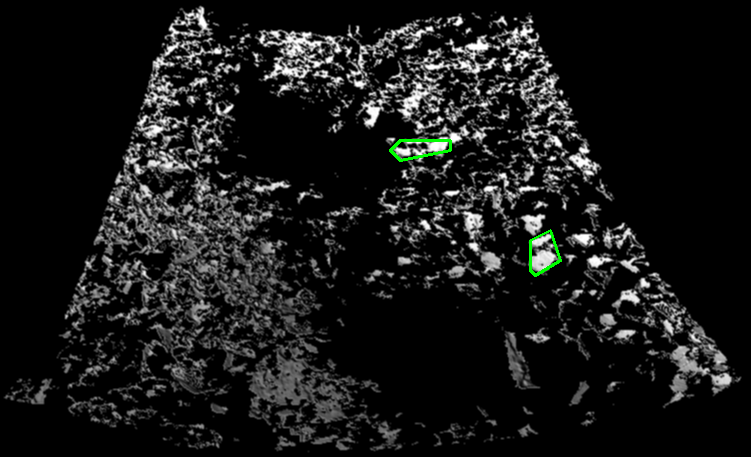

In [11]:
# Example of visualizing with polygons
# Define polygons to visualize on the projected point cloud
lst_polygon = [
    [(450, 140), (450, 150), (400, 160), (390, 150), (400, 140)],
    [(560, 260), (550, 230), (530, 240), (530, 270), (535, 275)],
]
epoch.visualize(outfile=filename, from_notebook=True, lst_polygon=lst_polygon)

## Example of customising parameters:
Available parameters:
```python
filename (str, optional): Path to the where projected images will be saved. Defaults to None.
cloud_path (str, optional): Path to the point cloud file. Defaults to "Unknown".
make_range_image (bool, optional): Whether to generate a range image. Defaults to True.
make_color_image (bool, optional): Whether to generate a color image. Defaults to False.
resolution_cm (int, optional): Resolution of the images in centimeters. Defaults to 8.
rgb_light_intensity (int, optional): Intensity of the light for the RGB image. Defaults to 100.
range_light_intensity (int, optional): Intensity of the light for the range image. Defaults to 100.
apply_shading (bool, optional): Whether to apply shading to the images. Defaults to True.
```

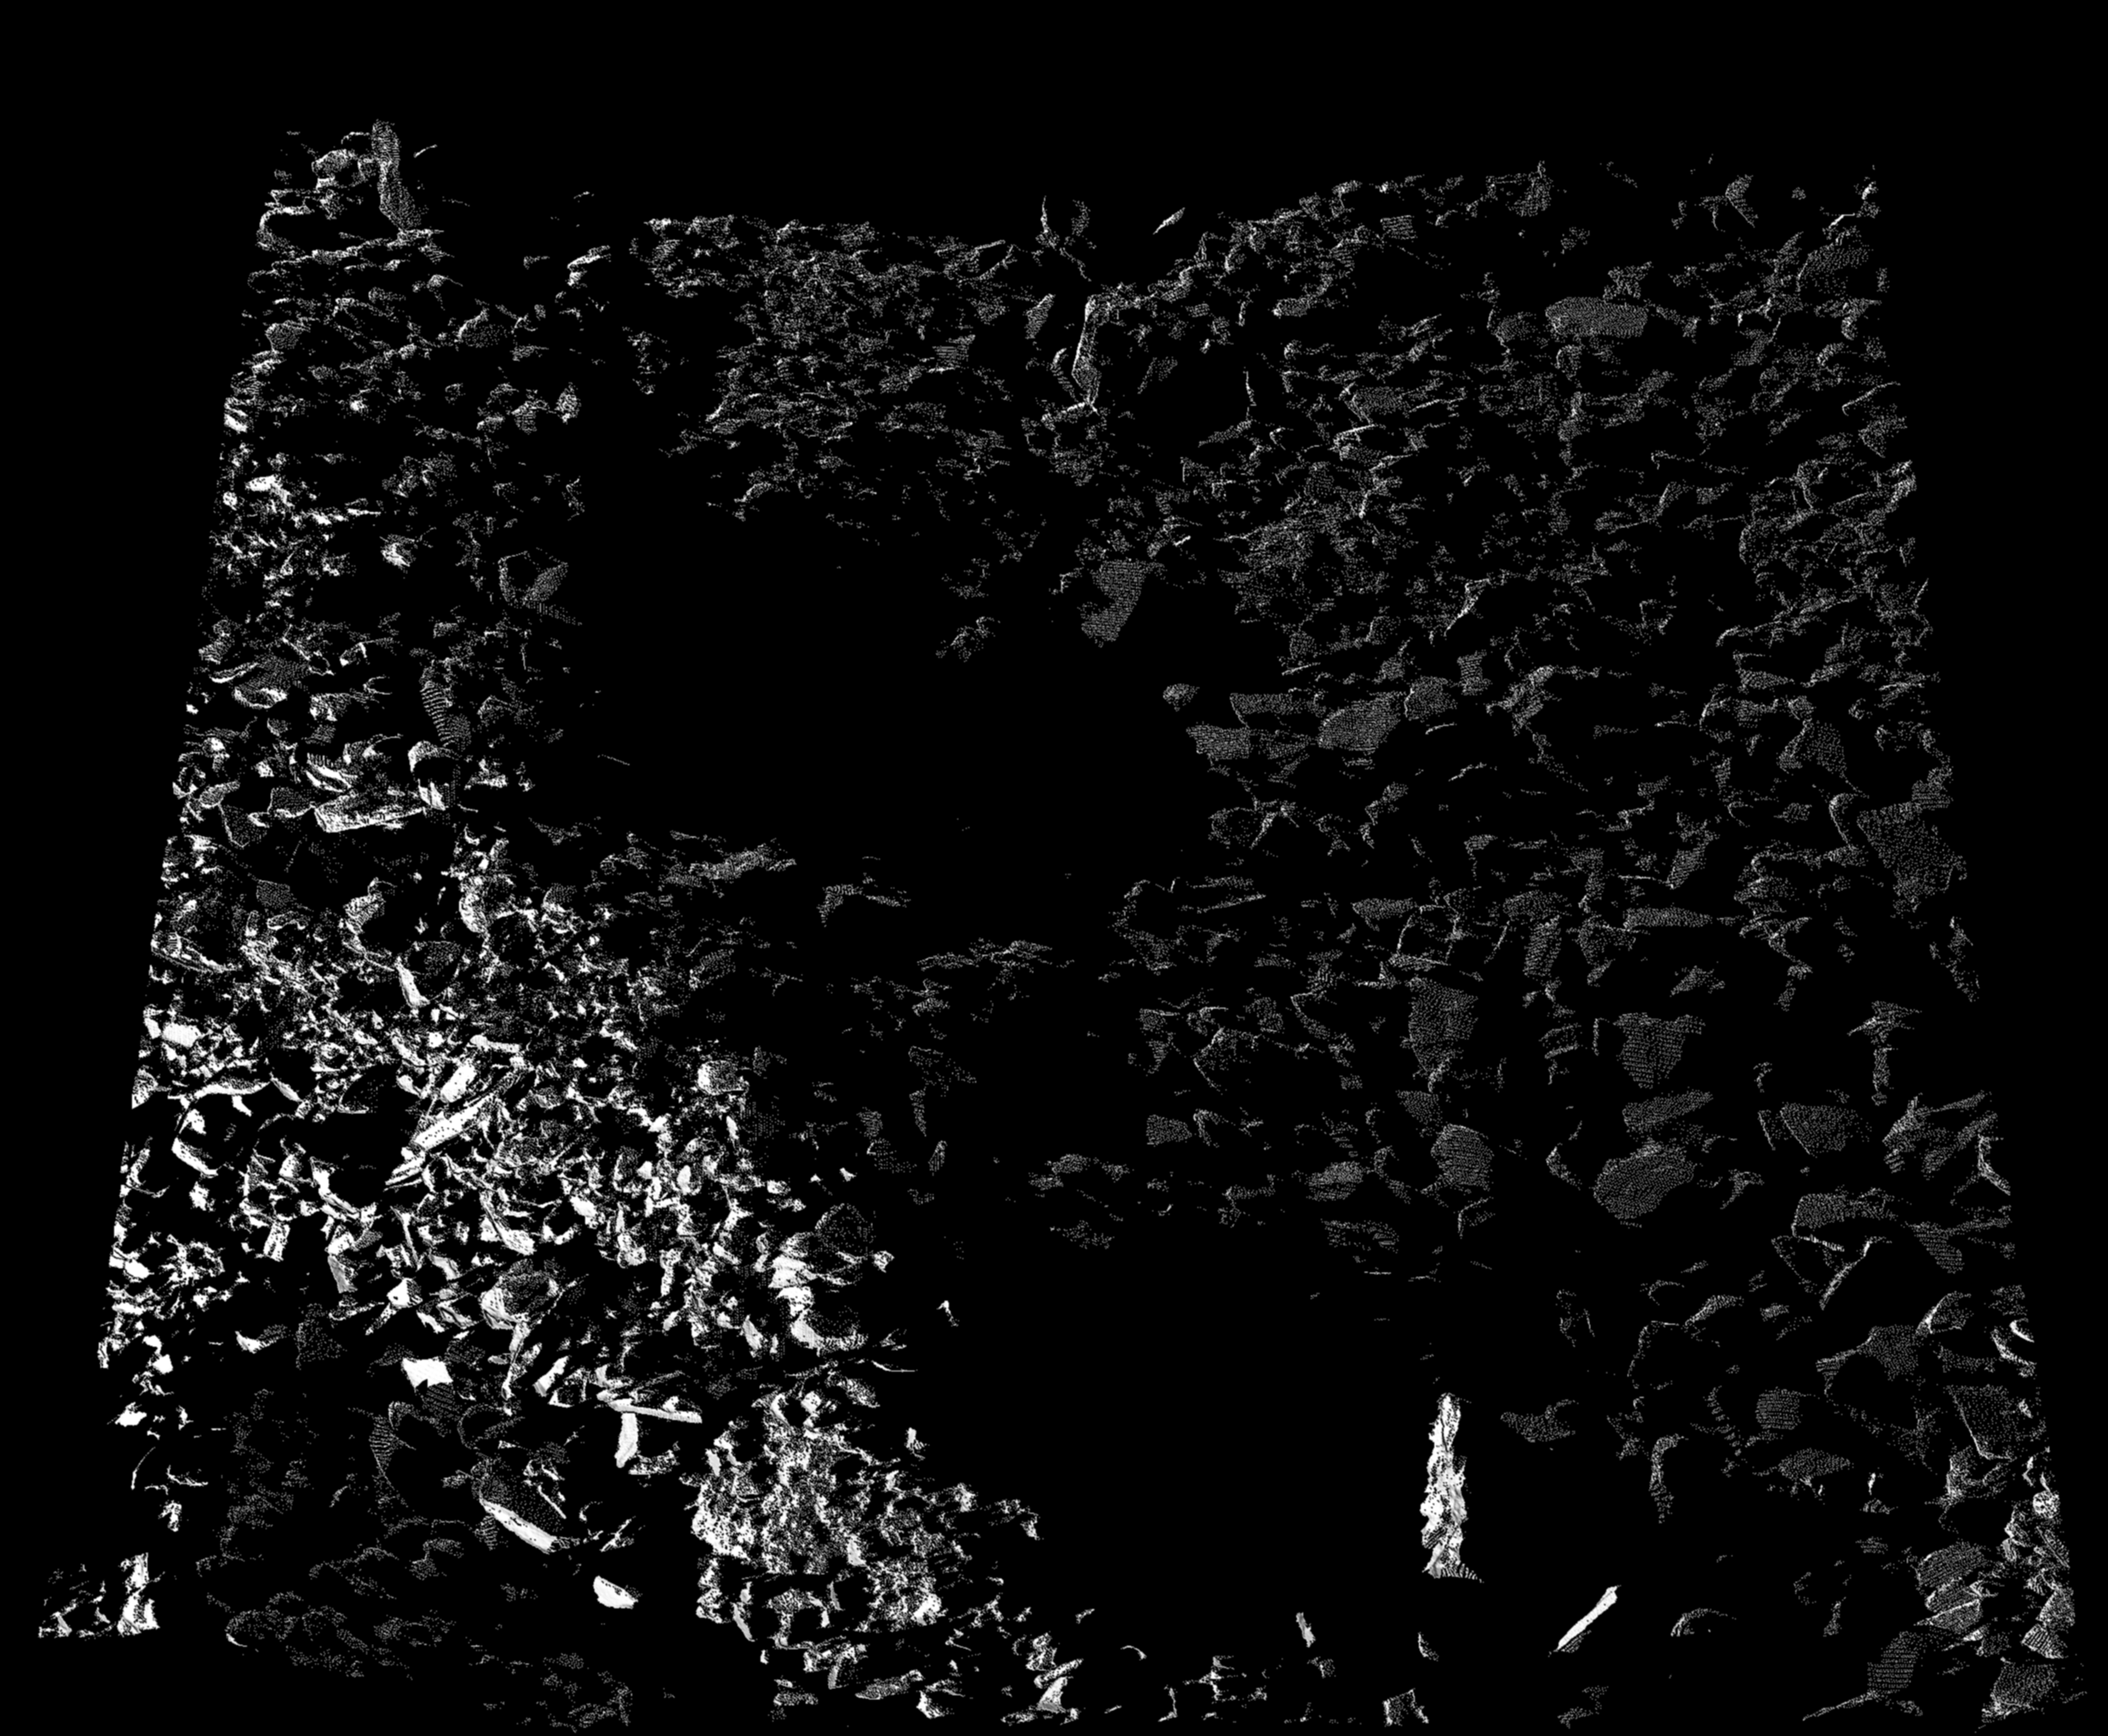

In [12]:
# Lets first view the point cloud from a different scanner position.
epoch.scanpos_info = [652920, 5189300, 2575]  # scanner position ([X, Y, Z])

# Also lets increase the range light intensity to 255 and the pixel resolution to 2 cm (from default 8 cm)
epoch.project_pc(range_light_intensity = 255, resolution_cm = 2)
epoch.visualize(outfile=filename, from_notebook=True)